In [1]:
import pandas
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv("march18_myspeed.csv")
df

,Service Provider,Technology,Test_type,Data Speed(Mbps),Signal_strength,LSA
0,JIO,4G,Upload,7.30,-63,Andhra Pradesh
1,JIO,4G,Upload,7.31,-65,Andhra Pradesh
2,JIO,4G,Upload,6.91,-65,Andhra Pradesh
3,VODAFONE,4G,Download,7.73,-90,Maharashtra
4,VODAFONE,4G,Download,6.92,-90,Maharashtra
5,VODAFONE,4G,Download,7.69,-87,Maharashtra
6,VODAFONE,4G,Download,13.33,-88,Maharashtra
7,VODAFONE,4G,Download,8.58,-80,Maharashtra
8,VODAFONE,4G,Download,26.90,-84,Maharashtra
9,VODAFONE,4G,Download,17.60,-89,Maharashtra


In [3]:
# set na to None
df.loc[df['Signal_strength'] == 'na', 'Signal_strength'] = None
df.loc[df.isnull()['Signal_strength']]

# convert 'Signal_strength' to float
df['Signal_strength'] = pandas.to_numeric(df.loc[:,'Signal_strength'])

In [4]:
print(df.head())

  Service Provider Technology Test_type  Data Speed(Mbps)  Signal_strength  \
0              JIO         4G    Upload              7.30            -63.0   
1              JIO         4G    Upload              7.31            -65.0   
2              JIO         4G    Upload              6.91            -65.0   
3         VODAFONE         4G  Download              7.73            -90.0   
4         VODAFONE         4G  Download              6.92            -90.0   

              LSA  
0  Andhra Pradesh  
1  Andhra Pradesh  
2  Andhra Pradesh  
3     Maharashtra  
4     Maharashtra  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322972 entries, 0 to 1322971
Data columns (total 6 columns):
Service Provider    1322972 non-null object
Technology          1322972 non-null object
Test_type           1322972 non-null object
Data Speed(Mbps)    1322972 non-null float64
Signal_strength     1220981 non-null float64
LSA                 1322972 non-null object
dtypes: float64(2), object(4)
memory usage: 60.6+ MB
None


In [6]:
print(df.describe())

       Data Speed(Mbps)  Signal_strength
count      1.322972e+06     1.220981e+06
mean       8.468365e+00    -8.922951e+01
std        1.482456e+01     1.475934e+01
min        0.000000e+00    -1.340000e+02
25%        9.000000e-01    -1.010000e+02
50%        3.170000e+00    -9.100000e+01
75%        8.440000e+00    -7.700000e+01
max        1.376500e+02    -5.500000e+01


In [7]:
df.isnull().sum()

Service Provider         0
Technology               0
Test_type                0
Data Speed(Mbps)         0
Signal_strength     101991
LSA                      0
dtype: int64

Technology
3G     136888
4G    1186084
Name: Technology, dtype: int64


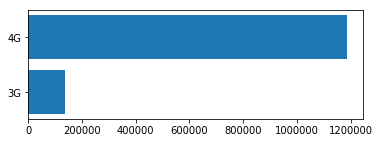

Test_type
Upload      661457
Download    661515
Name: Test_type, dtype: int64


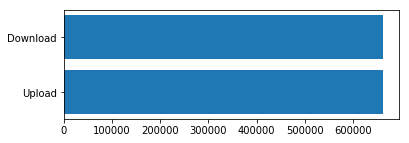

Service Provider
DOLPHIN         30
AIRCEL          60
UNINOR          82
CELLONE      11800
VODAFONE    115708
Name: Service Provider, dtype: int64


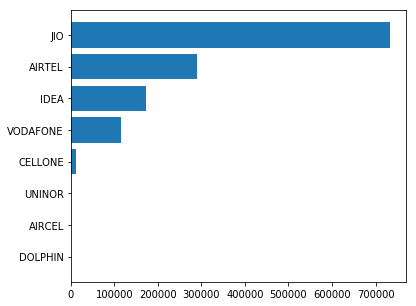

LSA
Chennai              8591
North East          12804
Himachal Pradesh    17755
Assam               22387
Jammu & Kashmir     24575
Name: LSA, dtype: int64


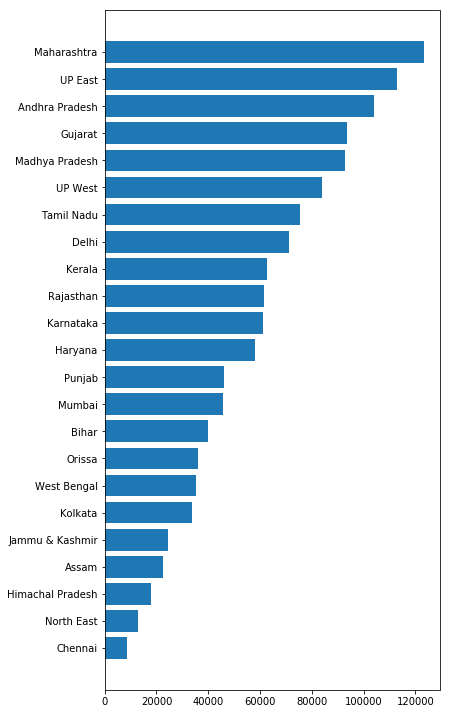

In [8]:
columns = ['Technology', 'Test_type', 'Service Provider', 'LSA']

for c in columns:
    v = df[c].unique()
    g = df.groupby(by=c)[c].count().sort_values(ascending=True)
    r = np.arange(len(v))
    print(g.head())
    plt.figure(figsize = (6, len(v)/2 +1))
    plt.barh(y = r, width = g.head(len(v)))
#     for (i, u) in enumerate(g.head(len(v))):
#         plt.text(x = u + 0.2, y = i - 0.08, s = str(round(u, 2)), color = 'blue', fontweight = 'bold')
#     plt.margins(x = 0.2)
    plt.yticks(r, g.index)
    plt.show()    

In [9]:
def sel(df, column_name, value):
    data = df.loc[(df[column_name] == value)]
    return data

pandas.DataFrame.mask = sel

In [26]:
import ipywidgets as widgets
state_select = widgets.Dropdown(
    options=['North East', 'Kolkata', 'Bihar', 'Chennai', 'Jammu & Kashmir', 'Delhi',
       'Tamil Nadu', 'Maharashtra', 'Punjab', 'UP East', 'Rajasthan',
       'Gujarat', 'West Bengal', 'Mumbai', 'Kerala', 'Andhra Pradesh',
       'UP West', 'Orissa', 'Assam', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Himachal Pradesh'],
    value='Delhi',
    description='States:',
    disabled=False,
)
provider_select = widgets.Dropdown(
    options=['JIO', 'VODAFONE', 'AIRTEL', 'IDEA', 'CELLONE', 'UNINOR', 'DOLPHIN', 'AIRCEL'],
    value='JIO',
    description='Provider:',
    disabled=False,
)
display(state_select)
display(provider_select)

A Jupyter Widget

A Jupyter Widget

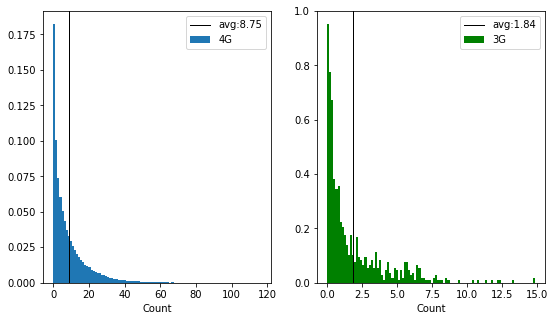

In [10]:
# plot distributions of speeds
#columns = ['Technology', 'Test_type', 'Service Provider', 'LSA']
provider = 'AIRTEL'

data = df.mask('Test_type', 'Download').mask('Service Provider', provider).mask('Technology', '4G')
x1 = data['Data Speed(Mbps)']
data = df.mask('Test_type', 'Download').mask('LSA', 'Assam').mask('Technology', '3G')
x2 = data['Data Speed(Mbps)']

#print(x1)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 5))
axes[0].hist(x1, bins=100, label = '4G', normed = True)
axes[0].axvline(x1.mean(), color = 'k', linewidth = 1, label = 'avg:'+str(round(x1.mean(), 2)))
axes[0].legend(loc = 'upper right')
axes[0].set_xlabel('Count')


# print(x2)
axes[1].hist(x2, bins=100, label = '3G', color = 'g', normed = True)
axes[1].axvline(x2.mean(), color = 'k', linewidth = 1, label = 'avg:'+str(round(x2.mean(), 2)))
axes[1].legend(loc = 'upper right')
axes[1].set_xlabel('Count')

#plot both histogram in one figure
# plt.figure(figsize = (9, 5))
# plt.hist(x1, bins=100, label = '4G', alpha = 0.5, normed = True)
# plt.axvline(x1.mean(), linewidth = 1, color = 'b', label = 'avg:'+str(round(x1.mean(), 2)))
# plt.legend(loc = 'upper right')
# plt.hist(x2, bins=100, label = '3G', color = 'g', alpha = 0.5, normed = True)
# plt.axvline(x2.mean(), linewidth = 1, color = 'g', label = 'avg:'+str(round(x.mean(), 2)))
# plt.legend(loc = 'upper right')

plt.show()

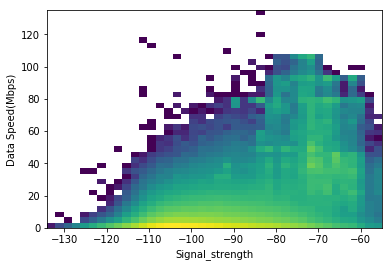

In [11]:
#2d histograms
#columns = ['Technology', 'Test_type', 'Service Provider', 'LSA']
import matplotlib.colors as colors

data = df.dropna().mask('Test_type', 'Download').mask('Technology', '4G')
#print(data.isnull().sum())
x = data['Signal_strength']
y = data['Data Speed(Mbps)']
plt.hist2d(x, y, bins = 40, norm=colors.LogNorm())
plt.ylabel('Data Speed(Mbps)')
plt.xlabel('Signal_strength')
plt.show()

Index(['North East', 'Kolkata', 'Bihar', 'Chennai', 'Jammu & Kashmir', 'Delhi',
       'Tamil Nadu', 'Maharashtra', 'Punjab', 'UP East', 'Rajasthan',
       'Gujarat', 'West Bengal', 'Mumbai', 'Kerala', 'Andhra Pradesh',
       'UP West', 'Orissa', 'Assam', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Himachal Pradesh'],
      dtype='object', name='LSA')


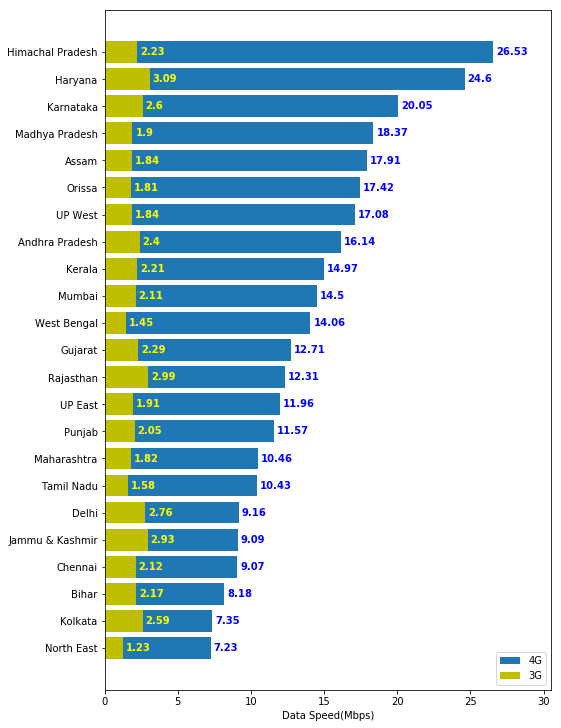

In [20]:
# avg speeds of states and service providers
#columns = ['Technology', 'Test_type', 'Service Provider', 'LSA']

state = 'LSA'
service = 'Service Provider'
speed = 'Data Speed(Mbps)'

values = df[state].unique()
r = np.arange(len(values))

plt.figure(figsize = (8, len(values)/2 +1))
plt.xlabel(speed)


# 4g
data = df.mask('Test_type', 'Download').mask('Technology', '4G')
group = data.groupby(by=state)[speed].mean().sort_values(ascending = True)
plt.barh(y = r, width = group.head(len(values)), label = '4G')
for (i, v) in enumerate(group.head(len(values))):
    plt.text(x = v + 0.2, y = i - 0.1, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
plt.yticks(r, group.index)

# 3g
data = df.mask('Test_type', 'Download').mask('Technology', '3G')
temp = data.groupby(by=state)[speed].mean()
# get correct positions of width according to previous sorting
for v in group.index:
    group.head(len(values))[v] = temp.head(len(values))[v]
    

plt.barh(y = r, width = group.head(len(values)), color = 'y', label = '3G')
for (i, v) in enumerate(group.head(len(values))):
    plt.text(x = v + 0.2, y = i - 0.1, s = str(round(v, 2)), color = 'yellow', fontweight = 'bold')


plt.margins(x = 0.15)
plt.legend(loc = 'lower right')
plt.show()

['JIO' 'VODAFONE' 'AIRTEL' 'IDEA' 'CELLONE' 'UNINOR' 'DOLPHIN' 'AIRCEL']


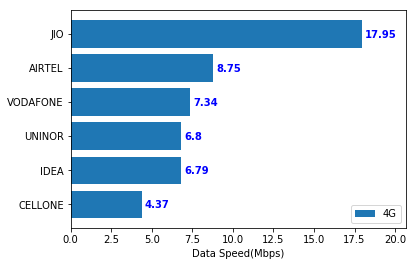

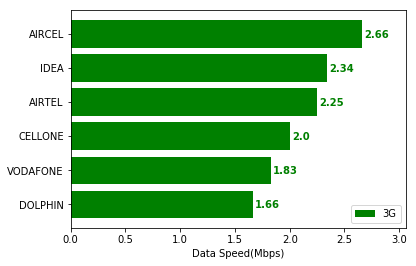

In [24]:
# avg speeds of states and service providers
#columns = ['Technology', 'Test_type', 'Service Provider', 'LSA']

#4g
print(df[service].unique())
data = df.mask('Test_type', 'Download').mask('Technology', '4G')
values = data[service].unique()
group = data.groupby(by=service)[speed].mean().sort_values(ascending = True)
r = np.arange(len(values))

plt.figure(figsize = (6, len(values)/2 +1))
plt.barh(y = r, width = group.head(len(values)), label = '4G')
for (i, v) in enumerate(group.head(len(values))):
    plt.text(x = v + 0.2, y = i - 0.1, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
plt.yticks(r, group.index)
plt.xlabel(speed)
plt.margins(x = 0.15)
plt.legend(loc = 'lower right')

#3g
data = df.mask('Test_type', 'Download').mask('Technology', '3G')
values = data[service].unique()
group = data.groupby(by=service)[speed].mean().sort_values(ascending = True)
r = np.arange(len(values))

plt.figure(figsize = (6, len(values)/2 +1))
plt.barh(y = r, width = group.head(len(values)), color = 'g', label = '3G')
for (i, v) in enumerate(group.head(len(values))):
    plt.text(x = v + 0.02, y = i - 0.1, s = str(round(v, 2)), color = 'green', fontweight = 'bold')
plt.yticks(r, group.index)
plt.xlabel(speed)
plt.margins(x = 0.15)
plt.legend(loc = 'lower right')
plt.show()